In [1]:
from sklearn import datasets
import numpy.linalg as lin
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist, fashion_mnist
from keras import models
from keras.utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

# MNIST 기초

- inverve를 통한 mnist 학습
- 신경망을 통한 mnist 학습
- CNN 통한 mnist 학습
- fashion mnist, face db 테스트
- web 연동 (한글, 스케치 인식)

## 데이터 준비

In [2]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


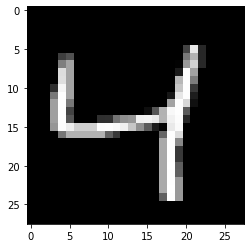

In [5]:
print(X_train.shape)
plt.imshow(X_train[2], cmap = 'gray')

(10000, 28, 28)


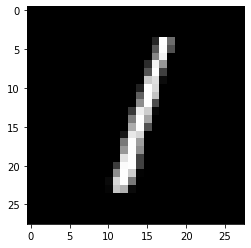

In [6]:
print(X_test.shape)
plt.imshow(X_test[2], cmap = 'gray')

In [9]:
print(X_test[2])
print(y_train.shape)
print(y_train)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254
  109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252
   82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  8

In [24]:
X_train = X_train.reshape((X_train.shape[0],784))
X_test = X_test.reshape((X_test.shape[0],784))

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [25]:
y_train_e = to_categorical(y_train)
y_test_e = to_categorical(y_test)

## 1. 역행렬을 이용한 MNIST 학습

   y = Wx + b

1. y = W * [x 1] -> [x 1] * W
    - A -> 60000x785(784+1) 행렬
    - 1은 y = Wx + b에서 상수 b
    - Y -> 60000x10 행렬
2. W = inv(A) * Y  
   - W -> 785x10 행렬
3. predict = [x 1] * W
    - x = 1x784
    - W = 785x10

In [26]:
A = np.hstack((X_train, np.ones((60000,1))))
print(A.shape)

(60000, 785)


In [27]:
%%time

W=np.matmul(lin.pinv(A), y_train_e)
print(W.shape)
print(W)
print(W[:,0].shape)

(785, 10)
[[ 7.44778176e-17  3.08116485e-17  6.24517735e-17 ... -1.88247216e-17
  -9.68761668e-17  2.74183832e-17]
 [-2.02652642e-15 -8.88043361e-15 -1.23469953e-14 ...  9.01778765e-15
   1.44453949e-14  4.97795720e-15]
 [ 3.89572462e-15  8.31633536e-15  8.79628286e-15 ... -6.90318037e-15
  -1.11422250e-14 -2.33884532e-15]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.57799659e-01  2.41326501e-01  4.98284745e-02 ...  1.41540555e-01
  -1.23002061e-01  4.55121243e-02]]
(785,)
Wall time: 9.03 s


(10000, 10)
(10000,)
[7 2 1 ... 4 5 6]


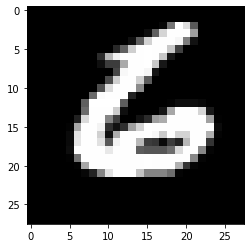

In [32]:
# test 데이터로 예측
T = np.hstack((X_test, np.ones((10000,1))))
p_ =np.matmul(T, W)
print(p_.shape)

p = np.argmax(p_,axis=1)
print(p.shape)
print(p)

plt.imshow(X_test[9999,:].reshape(28,28), cmap='gray')

In [29]:
# 인식률
np.mean(p==y_test)

0.8603

In [21]:
a = np.array([[1,2,3],
              [7,8,9],
              [4,5,6]])
print(np.argmax(a)) # 가장 큰값을 갖는 곳의 인덱스 
print(np.argmax(a, axis=1)) # 각 행에서 가장 큰 값을 갖는 곳 인덱스 
print(np.argmax(a, axis=0)) # 각 열에서 가장 큰 값을 갖는 곳 인덱스 

5
[2 2 2]
[1 1 1]


## 2. 신경망을 통한 MNIST 학습

In [33]:
model = Sequential()
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])

In [34]:
hist = model.fit(x = X_train, y = y_train_e,
                epochs = 10,
                verbose = 1,
                batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 9.7959 - accuracy: 0.8396
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.9115 - accuracy: 0.8809
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.6551 - accuracy: 0.8823
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.6154 - accuracy: 0.8840
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2871 - accuracy: 0.8883
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3310 - accuracy: 0.8876
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3427 - accuracy: 0.8861
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2069 - accuracy: 0.8894
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3156 - accuracy: 0.8885
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.237

In [36]:
score = model.evaluate(X_test, y_test_e, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 6.534481048583984
Test accuracy: 0.8790000081062317


In [38]:
p = model.predict(X_test)
print(p.shape)

p = np.argmax(p, axis=1)
print(p.shape)
print(p)
print(np.mean(p==y_test))

(10000, 10)
(10000,)
[7 2 1 ... 9 5 6]
0.879


**input size * 뉴런 수 + 뉴런수**

In [39]:
model.summary()

# 784 차원 + 1 
# 분류기 = 785*10 = 7850

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [43]:
model = Sequential()
model.add(Dense(5, input_dim=784, activation='relu')) # layer1 = 784*5+5
model.add(Dense(10, activation = 'softmax')) # layer2 = 5*10+10
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy']) 
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 5)                 3925      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [45]:
hist = model.fit(x = X_train, y = y_train_e,
                epochs = 100,
                verbose = 1,
                batch_size=100)

score = model.evaluate(X_test, y_test_e, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/100
600/600 [==============================] - 2s 3ms/step - loss: 1.7812 - accuracy: 0.3235
Epoch 2/100
600/600 [==============================] - 2s 3ms/step - loss: 1.6949 - accuracy: 0.3505
Epoch 3/100
600/600 [==============================] - 2s 3ms/step - loss: 1.6391 - accuracy: 0.3645
Epoch 4/100
600/600 [==============================] - 2s 3ms/step - loss: 1.5910 - accuracy: 0.3758
Epoch 5/100
600/600 [==============================] - 2s 3ms/step - loss: 1.5698 - accuracy: 0.3776
Epoch 6/100
600/600 [==============================] - 2s 3ms/step - loss: 1.5432 - accuracy: 0.3892
Epoch 7/100
600/600 [==============================] - 2s 3ms/step - loss: 1.5280 - accuracy: 0.3973
Epoch 8/100
600/600 [==============================] - 2s 3ms/step - loss: 1.5039 - accuracy: 0.4018
Epoch 9/100
600/600 [==============================] - 2s 3ms/step - loss: 1.4708 - accuracy: 0.4196
Epoch 10/100
600/600 [==============================] - 2s 3ms/step - loss: 1.3805 - accura

600/600 [==============================] - 2s 3ms/step - loss: 1.0299 - accuracy: 0.6496
Epoch 82/100
600/600 [==============================] - 2s 3ms/step - loss: 1.0337 - accuracy: 0.6503
Epoch 83/100
600/600 [==============================] - 2s 3ms/step - loss: 1.0326 - accuracy: 0.6500
Epoch 84/100
600/600 [==============================] - 2s 3ms/step - loss: 1.0309 - accuracy: 0.6523
Epoch 85/100
600/600 [==============================] - 2s 3ms/step - loss: 1.0319 - accuracy: 0.6503
Epoch 86/100
600/600 [==============================] - 1s 2ms/step - loss: 1.0279 - accuracy: 0.6511
Epoch 87/100
600/600 [==============================] - 2s 3ms/step - loss: 1.0319 - accuracy: 0.6499
Epoch 88/100
600/600 [==============================] - 2s 3ms/step - loss: 1.0283 - accuracy: 0.6523
Epoch 89/100
600/600 [==============================] - 2s 3ms/step - loss: 1.0359 - accuracy: 0.6473
Epoch 90/100
600/600 [==============================] - 2s 3ms/step - loss: 1.0301 - accuracy: 

In [46]:
model = Sequential()
model.add(Dense(256, input_dim=784, activation='relu')) 
model.add(Dense(128, activation = 'relu')) 
model.add(Dense(10, activation = 'softmax')) 
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy']) 
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [48]:
hist = model.fit(x = X_train, y = y_train_e,
                epochs = 50,
                verbose = 1,
                batch_size=100)

Epoch 1/50
600/600 [==============================] - 3s 4ms/step - loss: 2.2974 - accuracy: 0.8855
Epoch 2/50
600/600 [==============================] - 3s 4ms/step - loss: 0.3261 - accuracy: 0.9400
Epoch 3/50
600/600 [==============================] - 3s 4ms/step - loss: 0.1833 - accuracy: 0.9572
Epoch 4/50
600/600 [==============================] - 3s 4ms/step - loss: 0.1284 - accuracy: 0.9666
Epoch 5/50
600/600 [==============================] - 3s 4ms/step - loss: 0.1081 - accuracy: 0.9707
Epoch 6/50
600/600 [==============================] - 3s 4ms/step - loss: 0.0984 - accuracy: 0.9729
Epoch 7/50
600/600 [==============================] - 3s 4ms/step - loss: 0.0988 - accuracy: 0.9732
Epoch 8/50
600/600 [==============================] - 3s 4ms/step - loss: 0.0889 - accuracy: 0.9754
Epoch 9/50
600/600 [==============================] - 2s 4ms/step - loss: 0.0745 - accuracy: 0.9779
Epoch 10/50
600/600 [==============================] - 3s 4ms/step - loss: 0.0722 - accuracy: 0.9793

In [49]:
score = model.evaluate(X_test, y_test_e, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.32570669054985046
Test accuracy: 0.9707000255584717


### 정규화

In [50]:
X_train = X_train / 255
X_test = X_test / 255

In [51]:
hist = model.fit(x = X_train, y = y_train_e,
                epochs = 50,
                verbose = 1,
                batch_size=100)

Epoch 1/50
600/600 [==============================] - 3s 4ms/step - loss: 0.1442 - accuracy: 0.9518
Epoch 2/50
600/600 [==============================] - 3s 4ms/step - loss: 0.0102 - accuracy: 0.9978
Epoch 3/50
600/600 [==============================] - 3s 4ms/step - loss: 0.0050 - accuracy: 0.9991
Epoch 4/50
600/600 [==============================] - 3s 4ms/step - loss: 0.0026 - accuracy: 0.9995
Epoch 5/50
600/600 [==============================] - 3s 4ms/step - loss: 0.0019 - accuracy: 0.9997
Epoch 6/50
600/600 [==============================] - 3s 4ms/step - loss: 0.0033 - accuracy: 0.9992
Epoch 7/50
600/600 [==============================] - 3s 4ms/step - loss: 0.0027 - accuracy: 0.9995
Epoch 8/50
600/600 [==============================] - 3s 4ms/step - loss: 0.0034 - accuracy: 0.9992
Epoch 9/50
600/600 [==============================] - 3s 4ms/step - loss: 0.0079 - accuracy: 0.9977
Epoch 10/50
600/600 [==============================] - 3s 4ms/step - loss: 0.0043 - accuracy: 0.9984

In [52]:
score = model.evaluate(X_test, y_test_e, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12981492280960083
Test accuracy: 0.9818000197410583


## 3. CNN

In [53]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))
y_train_e = to_categorical(y_train)
y_test_e = to_categorical(y_test)

print(X_train.shape)
print(X_test.shape)

X_train = X_train/255
X_test = X_test/255

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
model = Sequential()

model.add(Conv2D(input_shape=(28,28,1), filters = 50, kernel_size= (3,3), 
                strides = (1,1), padding = 'same')) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation = 'relu')) 
model.add(Dense(10, activation = 'softmax')) 
adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer =adam, 
              metrics = ['accuracy']) 


In [55]:
model.summary() 

# input -> 60000 x 28 x 28 x 1
# layer -> ?, 28 x 28 x 50            500 = 3 x 3 x 50 + 50
# dense layer -> 9800*256 + 256

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 50)        500       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 50)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9800)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               2509056   
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2570      
Total params: 2,512,126
Trainable params: 2,512,126
Non-trainable params: 0
____________________________________________

In [62]:
model = Sequential()

model.add(Conv2D(input_shape=(28,28,1), filters = 50, kernel_size= (3,3), 
                strides = (1,1), padding = 'same')) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 30, kernel_size= (3,3), 
                strides = (1,1), padding = 'same')) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(256, activation = 'relu')) 
model.add(Dense(10, activation = 'softmax')) 
adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer =adam, 
              metrics = ['accuracy']) 

In [63]:
model.summary() 

# layer conv1 - > 3 * 3 * 1 * 50 + 50 = 500
#layer conv2 -> 3 * 3 * 50 * 30 + 30 = 13530

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 50)        500       
_________________________________________________________________
activation_5 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 50)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 30)        13530     
_________________________________________________________________
activation_6 (Activation)    (None, 14, 14, 30)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 30)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1470)             

In [65]:
hist = model.fit(x = X_train, y = y_train_e,
                 epochs = 5, validation_split=0.2, 
                 verbose = 1,
                 batch_size=100)

Epoch 1/5
480/480 [==============================] - 34s 70ms/step - loss: 0.0153 - accuracy: 0.9951 - val_loss: 0.0423 - val_accuracy: 0.9893
Epoch 2/5
480/480 [==============================] - 34s 71ms/step - loss: 0.0128 - accuracy: 0.9955 - val_loss: 0.0358 - val_accuracy: 0.9898
Epoch 3/5
480/480 [==============================] - 34s 71ms/step - loss: 0.0105 - accuracy: 0.9968 - val_loss: 0.0413 - val_accuracy: 0.9893
Epoch 4/5
480/480 [==============================] - 34s 71ms/step - loss: 0.0091 - accuracy: 0.9969 - val_loss: 0.0406 - val_accuracy: 0.9906
Epoch 5/5
480/480 [==============================] - 34s 71ms/step - loss: 0.0074 - accuracy: 0.9973 - val_loss: 0.0354 - val_accuracy: 0.9916


In [66]:
score = model.evaluate(X_test, y_test_e, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03477250412106514
Test accuracy: 0.9904000163078308
